In [334]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics


In [335]:
task_name = 'Mutagenicity'

# predictions for molecules with and without substructure masks
data_path_mol = '../prediction/summary/' + task_name + '_mol_prediction_summary.csv'
data_path_smask_fg = '../prediction/summary/' + task_name + '_fg_prediction_summary.csv'
data_path_smask_brics = '../prediction/summary/' + task_name + '_brics_prediction_summary.csv'
data_path_smask_brics_emerge = '../prediction/summary/' + task_name + '_brics_emerge_prediction_summary.csv'
data_path_smask_murcko = '../prediction/summary/' + task_name + '_murcko_prediction_summary.csv'
data_path_smask_murcko_emerge = '../prediction/summary/' + task_name + '_murcko_emerge_prediction_summary.csv'

# attribution scores for the substructure masks
path_smask_fg_attribution = '../prediction/attribution/' + task_name + '_fg_attribution_summary.csv'
path_smask_brics_attribution = '../prediction/attribution/' + task_name + '_brics_attribution_summary.csv'
path_smask_brics_emerge_attribution = '../prediction/attribution/' + task_name + '_brics_emerge_attribution_summary.csv'
path_smask_murcko_attribution = '../prediction/attribution/' + task_name + '_murcko_attribution_summary.csv'
path_smask_murcko_emerge_attribution = '../prediction/attribution/' + task_name + '_murcko_emerge_attribution_summary.csv'


In [342]:
# load data
data_mol = pd.read_csv(data_path_mol)
data_smask_fg = pd.read_csv(data_path_smask_fg)
data_smask_brics = pd.read_csv(data_path_smask_brics)
data_smask_brics_emerge = pd.read_csv(data_path_smask_brics_emerge)
data_smask_murcko = pd.read_csv(data_path_smask_murcko)
data_smask_murcko_emerge = pd.read_csv(data_path_smask_murcko_emerge)

data_smask_fg_attribution = pd.read_csv(path_smask_fg_attribution)
data_smask_brics_attribution = pd.read_csv(path_smask_brics_attribution)
data_smask_brics_emerge_attribution = pd.read_csv(path_smask_brics_emerge_attribution)
data_smask_murcko_attribution = pd.read_csv(path_smask_murcko_attribution)
data_smask_murcko_emerge_attribution = pd.read_csv(path_smask_murcko_emerge_attribution)

In [171]:
data_mol

,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std
0,Br/C=C/Br,1.0,noname,training,0.965351,0.776758,0.992938,0.963964,0.994616,0.991518,0.995365,0.817198,0.917920,0.943405,0.935903,0.078018
1,BrC(Br)Br,1.0,noname,training,0.534078,0.975998,0.999595,0.883009,0.958903,0.944101,0.968979,0.577899,0.950416,0.503003,0.829598,0.203958
2,BrC(Br)C(Br)(Br)Br,0.0,noname,training,0.033243,0.604935,0.089093,0.015768,0.143394,0.005841,0.014125,0.281884,0.000355,0.282411,0.147105,0.194036
3,BrC(Br)C(Br)Br,0.0,noname,training,0.034984,0.577018,0.048302,0.007717,0.048394,0.011149,0.094015,0.203856,0.000707,0.182702,0.120884,0.175334
4,BrC/C=C\CBr,1.0,noname,training,0.959285,0.923481,0.992506,0.983778,0.974871,0.989812,0.988103,0.918648,0.995279,0.864767,0.959053,0.043296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,c1cnccn1,0.0,noname,training,0.262552,0.160119,0.230631,0.182190,0.058099,0.062345,0.157436,0.127663,0.152486,0.076744,0.147026,0.068537
7668,c1csc(-c2nc(N3CCOCC3)c3ccccc3n2)c1,1.0,noname,training,0.561638,0.612791,0.703002,0.719327,0.874414,0.956561,0.989946,0.665142,0.698054,0.844109,0.762498,0.145438
7669,c1cscn1,1.0,noname,training,0.414827,0.279159,0.918118,0.551818,0.376787,0.858328,0.519087,0.325807,0.751774,0.567242,0.556295,0.222122
7670,c1scc2c1-c1cscc1C1NC21,1.0,noname,test,0.984245,0.918784,0.993505,0.983202,0.996069,0.986350,0.997392,0.979191,0.989668,0.988243,0.981665,0.022836


In [172]:
def metric_result(data, metric=metrics.accuracy_score):
    y_true_list = data['label'].tolist()
    if metric == metrics.roc_auc_score:
        return round(metric(y_true_list, data['pred_mean'].tolist()), 4)
    else:
        y_pred_label = [1 if x >= 0.5 else 0 for x in data['pred_mean'].tolist()]
        return round(metric(y_true_list, y_pred_label), 4)

In [173]:
print("Accuracy on training set", metric_result(data_mol[data_mol['group'] == 'training']))
print("Accuracy on test set", metric_result(data_mol[data_mol['group'] == 'test']))
print("Accurary on val set", metric_result(data_mol[data_mol['group'] == 'val']))

Accuracy on training set 0.9436
Accuracy on test set 0.8203
Accurary on val set 0.8644


In [174]:
print("AUC on training set", metric_result(data_mol[data_mol['group'] == 'training'], metrics.roc_auc_score))
print("AUC on test set", metric_result(data_mol[data_mol['group'] == 'test'], metrics.roc_auc_score))
print("AUC on val set", metric_result(data_mol[data_mol['group'] == 'val'], metrics.roc_auc_score))

AUC on training set 0.9867
AUC on test set 0.8963
AUC on val set 0.9285


In [175]:
# count number of molecules in each set (train, test, val), also include what percentage of total data that is
print("Number of molecules in training set", len(data_mol[data_mol['group'] == 'training']), ", percentage of total data", round(len(data_mol[data_mol['group'] == 'training'])/len(data_mol)*100, 2), "%")
print("Number of molecules in test set", len(data_mol[data_mol['group'] == 'test']), ", percentage of total data", round(len(data_mol[data_mol['group'] == 'test'])/len(data_mol)*100, 2), "%")
print("Number of molecules in val set", len(data_mol[data_mol['group'] == 'val']), ", percentage of total data", round(len(data_mol[data_mol['group'] == 'val'])/len(data_mol)*100, 2), "%")


Number of molecules in training set 6137 , percentage of total data 79.99 %
Number of molecules in test set 768 , percentage of total data 10.01 %
Number of molecules in val set 767 , percentage of total data 10.0 %


# Evaluation of test set

In [176]:
data = data_mol[data_mol['group'] == 'test']
data 

,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std
7,BrCC(Br)C1CCC(Br)C(Br)C1,0.0,noname,test,0.706303,0.271140,0.065021,0.148265,0.883360,0.835524,0.052880,0.742457,0.630077,0.218627,0.455365,0.333712
17,BrC[C@H]1CO1,1.0,noname,test,0.998204,0.994897,0.998822,0.998811,0.998644,0.999619,0.998626,0.989930,0.998476,0.997811,0.997384,0.002906
33,Br[C@H]1CC[C@@H](Br)[C@H](Br)CC[C@H](Br)[C@H](...,0.0,noname,test,0.025529,0.196218,0.022052,0.001184,0.059785,0.008594,0.027662,0.081372,0.000018,0.046696,0.046911,0.058547
52,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21CC,0.0,noname,test,0.015305,0.021666,0.014406,0.015713,0.008648,0.001331,0.003672,0.019230,0.021078,0.002061,0.012311,0.007823
68,C#C[C@]1(OC(C)=O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[...,0.0,noname,test,0.038123,0.165522,0.010589,0.051993,0.083460,0.002490,0.004206,0.024705,0.033911,0.003435,0.041843,0.050464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,c1ccc2nc3c(cc2c1)-c1cccc2cccc-3c12,0.0,noname,test,0.917721,0.880148,0.919437,0.926897,0.890148,0.958154,0.985617,0.936359,0.825813,0.773175,0.901347,0.062814
7661,c1cnc2c(c1)ccc1ncccc12,1.0,noname,test,0.907612,0.859651,0.927557,0.694584,0.926590,0.933193,0.929184,0.894851,0.881693,0.877575,0.883249,0.070993
7662,c1cnc2c3c(ccc2c1)C1OC1CC3,0.0,noname,test,0.594422,0.642674,0.574960,0.541320,0.312866,0.156882,0.706987,0.458542,0.271813,0.632057,0.489252,0.183261
7663,c1cnc2c3c(ccc2c1)CCC1OC31,1.0,noname,test,0.644278,0.674824,0.306419,0.489109,0.374743,0.402222,0.681836,0.534362,0.245294,0.316033,0.466912,0.162014


In [178]:
y_true_list = data['label'].tolist()
y_pred_label = [1 if x >= 0.5 else 0 for x in data['pred_mean'].tolist()]
print("Accuracy on test set", round(metrics.accuracy_score(y_true_list, y_pred_label), 4))
print("AUC on test set", round(metrics.roc_auc_score(y_true_list, data['pred_mean'].tolist()), 4))

Accuracy on test set 0.8203
AUC on test set 0.8963


In [179]:
# add column to data for the predicted label (0 or 1)
data['pred_label'] = y_pred_label

# add column to data for whether the prediction was correct
data['correct'] = data['label'] == data['pred_label']
data

/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std,pred_label,correct
7,BrCC(Br)C1CCC(Br)C(Br)C1,0.0,noname,test,0.706303,0.271140,0.065021,0.148265,0.883360,0.835524,0.052880,0.742457,0.630077,0.218627,0.455365,0.333712,0,True
17,BrC[C@H]1CO1,1.0,noname,test,0.998204,0.994897,0.998822,0.998811,0.998644,0.999619,0.998626,0.989930,0.998476,0.997811,0.997384,0.002906,1,True
33,Br[C@H]1CC[C@@H](Br)[C@H](Br)CC[C@H](Br)[C@H](...,0.0,noname,test,0.025529,0.196218,0.022052,0.001184,0.059785,0.008594,0.027662,0.081372,0.000018,0.046696,0.046911,0.058547,0,True
52,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21CC,0.0,noname,test,0.015305,0.021666,0.014406,0.015713,0.008648,0.001331,0.003672,0.019230,0.021078,0.002061,0.012311,0.007823,0,True
68,C#C[C@]1(OC(C)=O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[...,0.0,noname,test,0.038123,0.165522,0.010589,0.051993,0.083460,0.002490,0.004206,0.024705,0.033911,0.003435,0.041843,0.050464,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,c1ccc2nc3c(cc2c1)-c1cccc2cccc-3c12,0.0,noname,test,0.917721,0.880148,0.919437,0.926897,0.890148,0.958154,0.985617,0.936359,0.825813,0.773175,0.901347,0.062814,1,False
7661,c1cnc2c(c1)ccc1ncccc12,1.0,noname,test,0.907612,0.859651,0.927557,0.694584,0.926590,0.933193,0.929184,0.894851,0.881693,0.877575,0.883249,0.070993,1,True
7662,c1cnc2c3c(ccc2c1)C1OC1CC3,0.0,noname,test,0.594422,0.642674,0.574960,0.541320,0.312866,0.156882,0.706987,0.458542,0.271813,0.632057,0.489252,0.183261,0,True
7663,c1cnc2c3c(ccc2c1)CCC1OC31,1.0,noname,test,0.644278,0.674824,0.306419,0.489109,0.374743,0.402222,0.681836,0.534362,0.245294,0.316033,0.466912,0.162014,0,False


### Softmax score

In [181]:
softmax = data['pred_mean'].tolist()


In [182]:
# add column for softmax score. The score is the same as the mean prediction if this one is higher than 0.5, otherwise 1 - mean prediction
data['softmax'] = data['pred_mean']
data.loc[data['pred_mean'] < 0.5, 'softmax'] = 1 - data['pred_mean']

# get softmax scores for the correct and incorrect predictions
softmax_correct = data[data['correct'] == True]['softmax'].tolist()
softmax_incorrect = data[data['correct'] == False]['softmax'].tolist()

/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


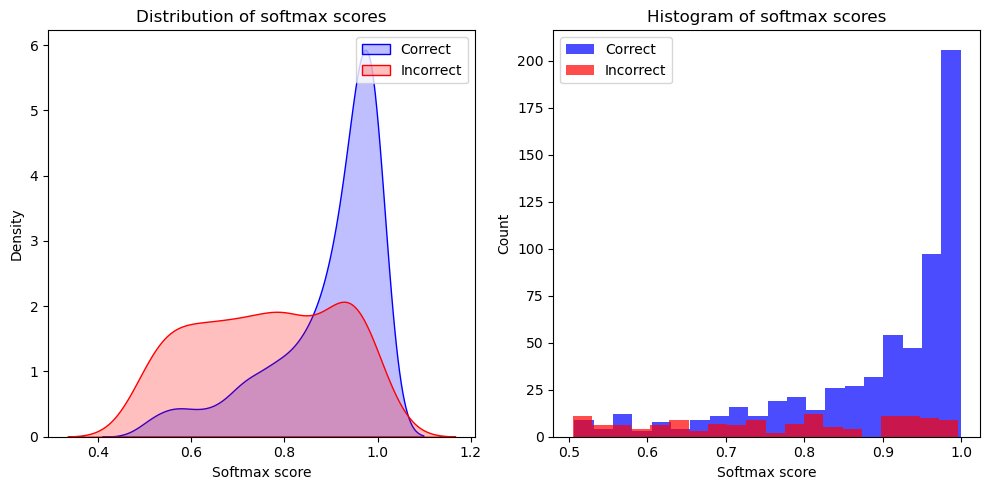

In [183]:
# plot the softmax scores for the correct and incorrect predictions as distributions and as histograms. 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(softmax_correct, label='Correct', color='blue', shade=True)
sns.kdeplot(softmax_incorrect, label='Incorrect', color='red', shade=True)
plt.xlabel('Softmax score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of softmax scores')
plt.subplot(1, 2, 2)
plt.hist(softmax_correct, bins=20, alpha=0.7, label='Correct', color='blue')
plt.hist(softmax_incorrect, bins=20, alpha=0.7, label='Incorrect', color='red')
plt.xlabel('Softmax score')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of softmax scores')
plt.tight_layout()
plt.show()


In [193]:
def acc_plot_by_uq(data):
    # sort data by the softmax score with high scores first
    data = data.sort_values(by='softmax', ascending=False)

    accuracy_list = []

    # iterate over the data and calculate the accuracies when only using the top n predictions. Do this in steps of 100
    for i in range(100, len(data), 100):
        # the subset is the data from row 0 to row i
        subset = data.iloc[:i]
        y_true_list = subset['label'].tolist()
        y_pred_label = subset['pred_label'].tolist()
        accuracy = metrics.accuracy_score(y_true_list, y_pred_label)
        accuracy_list.append(accuracy)

    # plot the accuracy as a function of the number of predictions used
    plt.figure(figsize=(5, 3))
    plt.plot(range(100, len(data), 100), accuracy_list)
    plt.xlabel('Number of predictions included with best UQ scores')
    plt.ylabel('Accuracy')
    #plt.title('Accuracy as a function of the number of predictions included with best UQ scores')
    plt.show()

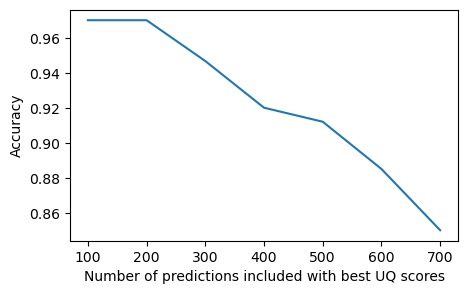

In [194]:
acc_plot_by_uq(data)

In [191]:
def auc_plot_by_uq(data):
    # sort data by the softmax score with high scores first
    data = data.sort_values(by='softmax', ascending=False)

    auc_list = []

    # iterate over the data and calculate the AUC when only using the top n predictions. Do this in steps of 100
    for i in range(100, len(data), 100):
        # the subset is the data from row 0 to row i
        subset = data.iloc[:i]
        y_true_list = subset['label'].tolist()
        y_pred_list = subset['pred_mean'].tolist()
        auc = metrics.roc_auc_score(y_true_list, y_pred_list)
        auc_list.append(auc)

    # plot the AUC as a function of the number of predictions used
    plt.figure(figsize=(5, 3))
    plt.plot(range(100, len(data), 100), auc_list)
    plt.xlabel('Number of predictions included with best UQ scores')
    plt.ylabel('AUC')
    plt.show()

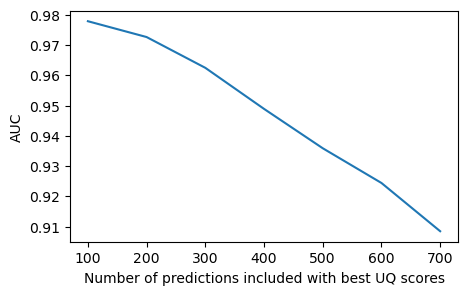

In [192]:
auc_plot_by_uq(data)

### variance-based ensemble uncertainty

In [195]:
# add column to data that calculates the variance of the predictions (std^2)
data['uq_variance'] = data['pred_std'] ** 2
data

/home/mawod/miniforge3/envs/SME/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std,pred_label,correct,softmax,uq_variance
7,BrCC(Br)C1CCC(Br)C(Br)C1,0.0,noname,test,0.706303,0.271140,0.065021,0.148265,0.883360,0.835524,0.052880,0.742457,0.630077,0.218627,0.455365,0.333712,0,True,0.544635,0.111364
17,BrC[C@H]1CO1,1.0,noname,test,0.998204,0.994897,0.998822,0.998811,0.998644,0.999619,0.998626,0.989930,0.998476,0.997811,0.997384,0.002906,1,True,0.997384,0.000008
33,Br[C@H]1CC[C@@H](Br)[C@H](Br)CC[C@H](Br)[C@H](...,0.0,noname,test,0.025529,0.196218,0.022052,0.001184,0.059785,0.008594,0.027662,0.081372,0.000018,0.046696,0.046911,0.058547,0,True,0.953089,0.003428
52,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21CC,0.0,noname,test,0.015305,0.021666,0.014406,0.015713,0.008648,0.001331,0.003672,0.019230,0.021078,0.002061,0.012311,0.007823,0,True,0.987689,0.000061
68,C#C[C@]1(OC(C)=O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[...,0.0,noname,test,0.038123,0.165522,0.010589,0.051993,0.083460,0.002490,0.004206,0.024705,0.033911,0.003435,0.041843,0.050464,0,True,0.958157,0.002547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,c1ccc2nc3c(cc2c1)-c1cccc2cccc-3c12,0.0,noname,test,0.917721,0.880148,0.919437,0.926897,0.890148,0.958154,0.985617,0.936359,0.825813,0.773175,0.901347,0.062814,1,False,0.901347,0.003946
7661,c1cnc2c(c1)ccc1ncccc12,1.0,noname,test,0.907612,0.859651,0.927557,0.694584,0.926590,0.933193,0.929184,0.894851,0.881693,0.877575,0.883249,0.070993,1,True,0.883249,0.005040
7662,c1cnc2c3c(ccc2c1)C1OC1CC3,0.0,noname,test,0.594422,0.642674,0.574960,0.541320,0.312866,0.156882,0.706987,0.458542,0.271813,0.632057,0.489252,0.183261,0,True,0.510748,0.033585
7663,c1cnc2c3c(ccc2c1)CCC1OC31,1.0,noname,test,0.644278,0.674824,0.306419,0.489109,0.374743,0.402222,0.681836,0.534362,0.245294,0.316033,0.466912,0.162014,0,False,0.533088,0.026249


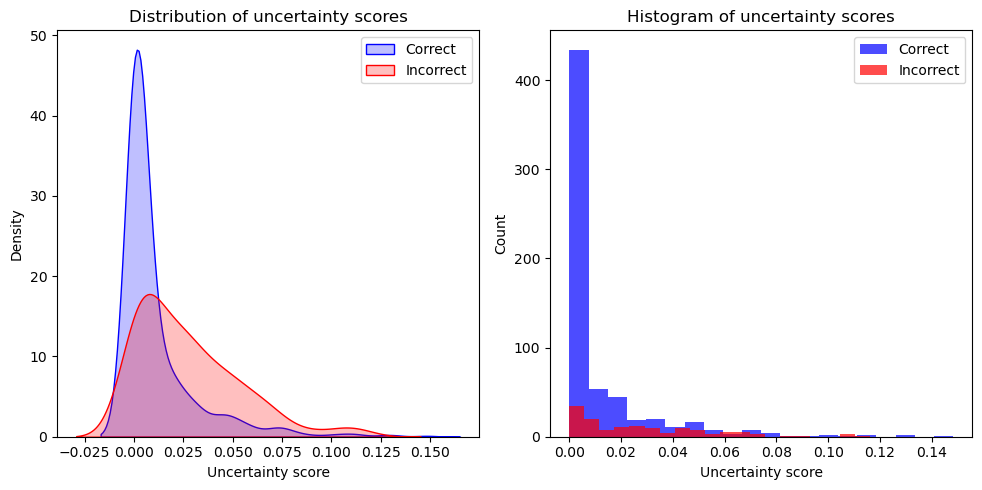

In [196]:
# plot the softmax scores for the correct and incorrect predictions as distributions and as histograms. 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data[data['correct'] == True]['uq_variance'], label='Correct', color='blue', shade=True)
sns.kdeplot(data[data['correct'] == False]['uq_variance'], label='Incorrect', color='red', shade=True)
plt.xlabel('Uncertainty score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of uncertainty scores')
plt.subplot(1, 2, 2)
plt.hist(data[data['correct'] == True]['uq_variance'], bins=20, alpha=0.7, label='Correct', color='blue')
plt.hist(data[data['correct'] == False]['uq_variance'], bins=20, alpha=0.7, label='Incorrect', color='red')
plt.xlabel('Uncertainty score')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of uncertainty scores')
plt.tight_layout()
plt.show()

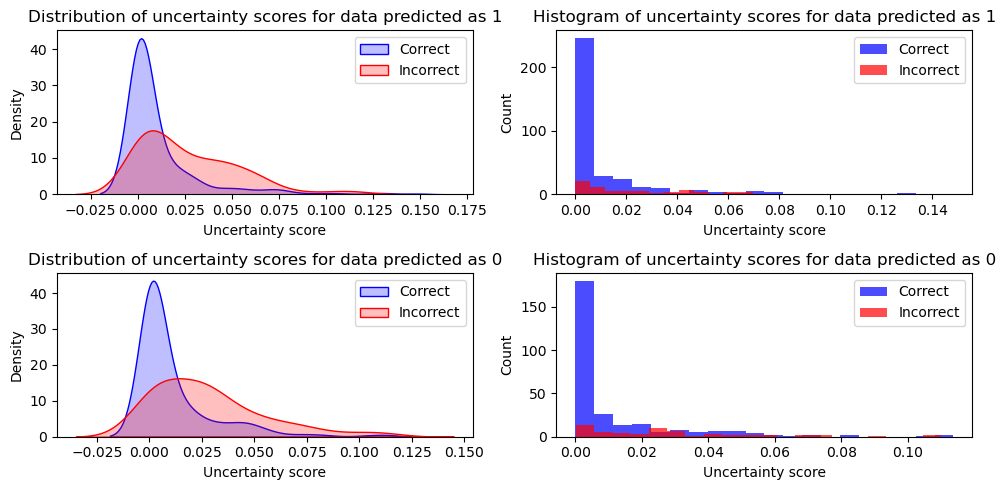

In [197]:
# do the same plots as before, but now have 4 plots: two for correct and two for incorrect predictions, one for the data which was predicted as 1 and one for the data which was predicted as 0
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.kdeplot(data[(data['correct'] == True) & (data['pred_label'] == 1)]['uq_variance'], label='Correct', color='blue', shade=True)
sns.kdeplot(data[(data['correct'] == False) & (data['pred_label'] == 1)]['uq_variance'], label='Incorrect', color='red', shade=True)
plt.xlabel('Uncertainty score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of uncertainty scores for data predicted as 1')
plt.subplot(2, 2, 2)
plt.hist(data[(data['correct'] == True) & (data['pred_label'] == 1)]['uq_variance'], bins=20, alpha=0.7, label='Correct', color='blue')
plt.hist(data[(data['correct'] == False) & (data['pred_label'] == 1)]['uq_variance'], bins=20, alpha=0.7, label='Incorrect', color='red')
plt.xlabel('Uncertainty score')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of uncertainty scores for data predicted as 1')
plt.subplot(2, 2, 3)
sns.kdeplot(data[(data['correct'] == True) & (data['pred_label'] == 0)]['uq_variance'], label='Correct', color='blue', shade=True)
sns.kdeplot(data[(data['correct'] == False) & (data['pred_label'] == 0)]['uq_variance'], label='Incorrect', color='red', shade=True)
plt.xlabel('Uncertainty score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of uncertainty scores for data predicted as 0')
plt.subplot(2, 2, 4)
plt.hist(data[(data['correct'] == True) & (data['pred_label'] == 0)]['uq_variance'], bins=20, alpha=0.7, label='Correct', color='blue')
plt.hist(data[(data['correct'] == False) & (data['pred_label'] == 0)]['uq_variance'], bins=20, alpha=0.7, label='Incorrect', color='red')
plt.xlabel('Uncertainty score')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of uncertainty scores for data predicted as 0')
plt.tight_layout()
plt.show()


In [198]:
def acc_by_uq(data, column_name, ascending=True): 

    # sort data by the softmax score with high scores first
    data = data.sort_values(by=column_name, ascending=ascending)

    accuracy_list = []

    # iterate over the data and calculate the accuracies when only using the top n predictions. Do this in steps corresponding to percentages
    for i in range(1, 101):
        # the subset is the data from row 0 to row i
        subset = data.iloc[:int(i/100 * len(data))]
        y_true_list = subset['label'].tolist()
        y_pred_label = subset['pred_label'].tolist()
        accuracy = metrics.accuracy_score(y_true_list, y_pred_label)
        accuracy_list.append(accuracy)

    return accuracy_list

In [203]:
def acc_plot_by_uq(data):
    
    # by softmax
    accuracy_list_softmax_score = acc_by_uq(data, 'softmax', ascending=False)
    # by variance
    accuracy_list_variance = acc_by_uq(data, 'uq_variance')
    # by std
    # accuracy_list_std = acc_by_uq(data, 'pred_std')


    # plot 
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, len(accuracy_list_softmax_score)+1, 1), accuracy_list_softmax_score, label='Softmax score')
    plt.plot(range(1, len(accuracy_list_softmax_score)+1, 1), accuracy_list_variance, label='Ensemble variance')
    #plt.plot(range(100, len(data), 100), accuracy_list_std, label='Standard deviation')
    plt.xlabel('% of predictions included with best UQ scores')
    plt.ylabel('Accuracy')
    #plt.title('Accuracy as a function of the number of predictions included with best UQ scores')
    plt.legend()
    plt.show()

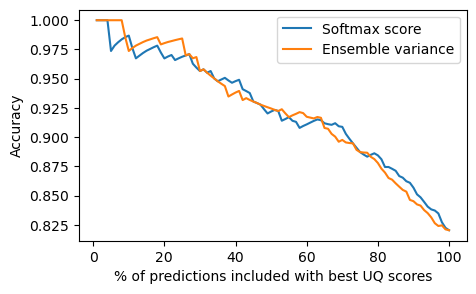

In [204]:
acc_plot_by_uq(data)

In [231]:
# do the same with AUC instead of accuracy
def auc_by_uq(data, column_name, ascending=True): 

    # sort data by the softmax score with high scores first
    data = data.sort_values(by=column_name, ascending=ascending)

    auc_list = []

    # iterate over the data and calculate the accuracies when only using the top n predictions. Do this in steps corresponding to percentages
    for i in range(1, 51):
        # the subset is the data from row 0 to row i
        subset = data.iloc[:int(i/50 * len(data))]
        y_true_list = subset['label'].tolist()
        y_pred_list = subset['pred_mean'].tolist()
        auc = metrics.roc_auc_score(y_true_list, y_pred_list)
        auc_list.append(auc)

    return auc_list

In [467]:
def auc_plot_by_uq(data):
    
    # by softmax
    auc_list_softmax_score = auc_by_uq(data, 'softmax', ascending=False)
    # by variance
    auc_list_variance = auc_by_uq(data, 'uq_variance', ascending=True)
    # by std
    # auc_list_std = auc_by_uq(data, 'pred_std')

    # flip the variance list so that the plot is more intuitive, i.e. the last element should be the first and vice versa
    auc_list_variance = auc_list_variance[::-1]
    auc_list_softmax_score = auc_list_softmax_score[::-1]




    # plot 
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, 101,2), auc_list_softmax_score, label='Softmax score')
    plt.plot(range(1, 101, 2), auc_list_variance, label='Ensemble variance')
    #plt.plot(range(100, len(data), 100), auc_list_std, label='Standard deviation')
    plt.xlabel('% of predictions excluded with highest UQ scores')
    plt.ylabel('AUC')
    #plt.title('Accuracy as a function of the number of predictions included with best UQ scores')
    plt.legend()

    plt.savefig('MUTAG_auc_plot_by_uq_increasing.pdf', bbox_inches='tight')

    plt.show()

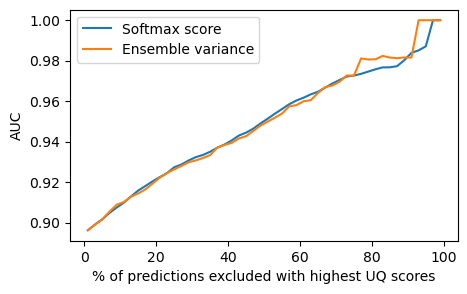

In [468]:
auc_plot_by_uq(data)

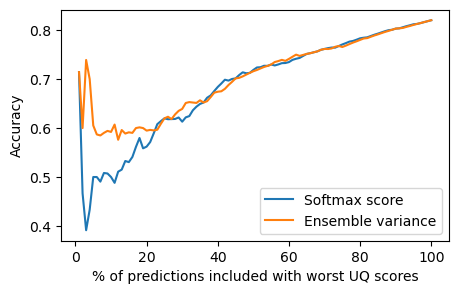

In [205]:
# now we can also look at the opposite: accuracy as a function of the number of predictions with the worst UQ scores
def acc_plot_by_worst_uq(data):
    
    # by softmax
    accuracy_list_softmax_score = acc_by_uq(data, 'softmax', ascending=True)
    # by variance
    accuracy_list_variance = acc_by_uq(data, 'uq_variance', ascending=False)
    # by std
    # accuracy_list_std = acc_by_uq(data, 'pred_std')


    # plot 
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, len(accuracy_list_softmax_score)+1, 1), accuracy_list_softmax_score, label='Softmax score')
    plt.plot(range(1, len(accuracy_list_softmax_score)+1, 1), accuracy_list_variance, label='Ensemble variance')
    #plt.plot(range(100, len(data), 100), accuracy_list_std, label='Standard deviation')
    plt.xlabel('% of predictions included with worst UQ scores')
    plt.ylabel('Accuracy')
    #plt.title('Accuracy as a function of the number of predictions included with worst UQ scores')
    plt.legend()
    plt.show()

acc_plot_by_worst_uq(data)

Conclusion: We should definitly set a threshold for trustworthiness: for both methods, low UQ scores means that it also likely that the prediction is incorrect!

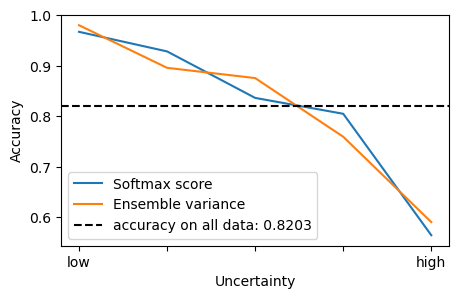

In [462]:
bins = 5
# now we want to plot the function of accuracy based on the uncertainty score. For that purpose, we will set 20 bins and calculate the accuracy for each bin
def acc_by_uq_bins(data, column_name, ascending=True, linear=False):
    
    # sort data by the softmax score with high scores first
    data = data.sort_values(by=column_name, ascending=ascending)

    accuracy_list = []

    # iterate over the data and calculate the accuracies when only using the top n predictions. Do this in steps corresponding to percentages
    if not linear:
        for i in range(1, bins+1):
            # the subset is the data from row 0 to row i
            subset = data.iloc[int((i-1)/bins * len(data)):int(i/bins * len(data))]
            y_true_list = subset['label'].tolist()
            y_pred_label = subset['pred_label'].tolist()
            accuracy = metrics.accuracy_score(y_true_list, y_pred_label)
            accuracy_list.append(accuracy)
    else:
        # make bins represent a linear representation of uncertainty scores between min and max value that appear
        min_val = data[column_name].min()
        max_val = data[column_name].max()
        stepsize = (max_val - min_val) / bins
        for i in range(1, bins+1):
            subset = data[(data[column_name] >= min_val + (i-1) * stepsize) & (data[column_name] < min_val + i * stepsize)]
            y_true_list = subset['label'].tolist()
            y_pred_label = subset['pred_label'].tolist()
            accuracy = metrics.accuracy_score(y_true_list, y_pred_label)
            accuracy_list.append(accuracy)

    return accuracy_list

def acc_plot_by_uq_bins(data):

    # overall accuracy of the model on this data
    acc = metric_result(data, metrics.accuracy_score)

    # by softmax
    accuracy_list_softmax_score = acc_by_uq_bins(data, 'softmax', ascending=False)
    # by variance
    accuracy_list_variance = acc_by_uq_bins(data, 'uq_variance', ascending=True)
    # by std
    # accuracy_list_std = acc_by_uq(data, 'pred_std')


    # plot 
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, len(accuracy_list_softmax_score)+1, 1), accuracy_list_softmax_score, label='Softmax score')
    plt.plot(range(1, len(accuracy_list_softmax_score)+1, 1), accuracy_list_variance, label='Ensemble variance')
    #plt.plot(range(100, len(data), 100), accuracy_list_std, label='Standard deviation')
    # add a line for the overall accuracy with number in the label
    plt.axhline(y=acc, color='black', linestyle='--', label='accuracy on all data: ' + str(round(acc, 4)))
    plt.xlabel('Uncertainty')
    xlabels = ['' for i in range(bins)]
    xlabels[0] = 'low'
    xlabels[-1] = 'high'
    plt.xticks(range(1, bins + 1, 1), xlabels)
    plt.ylabel('Accuracy')
    #plt.title('Likelihood of prediction being correct as a function of the uncertainty score')
    plt.legend()
    plt.savefig('MUTAG_acc_plot_by_uq_likelihood.pdf', bbox_inches='tight')
    plt.show()

acc_plot_by_uq_bins(data)

Note: this plot is based on subsets of same size! Redo a version where each "bin" is equally sized in step for uncertainty scores

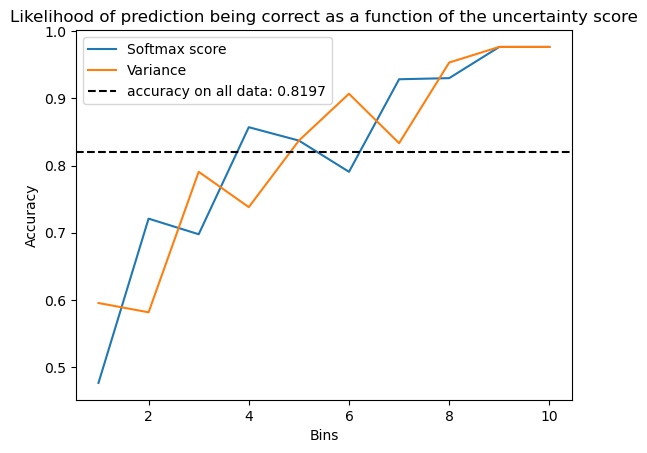

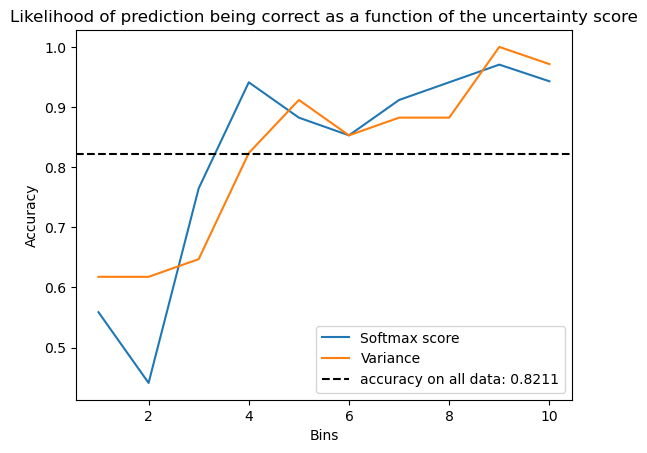

In [149]:
# split data into predicted as 1 and predicted as 0
data_pred_1 = data[data['pred_label'] == 1]
data_pred_0 = data[data['pred_label'] == 0]

# plot the function of accuracy based on the uncertainty score for the data predicted as 1
acc_plot_by_uq_bins(data_pred_1)

# plot the function of accuracy based on the uncertainty score for the data predicted as 0
acc_plot_by_uq_bins(data_pred_0)

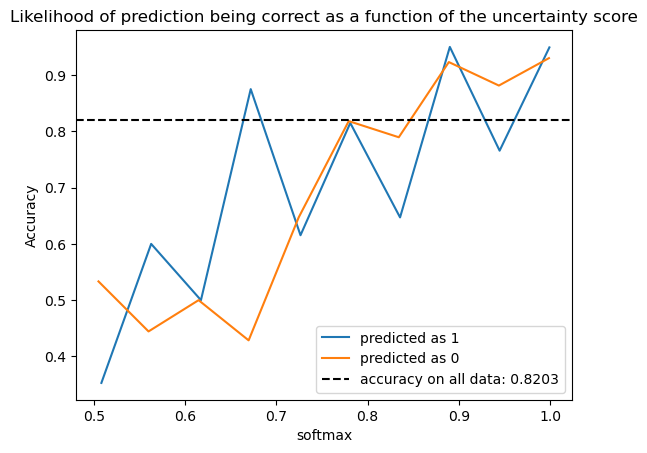

In [150]:
def acc_plot_by_uq_bins_linear(data, bins=10, method='softmax'):

    # overall accuracy of the model on this data
    acc = metric_result(data, metrics.accuracy_score)

    data_1 = data[data['pred_label'] == 1]
    data_0 = data[data['pred_label'] == 0]

    # by softmax
    accuracy_list_softmax_score_1 = acc_by_uq_bins(data_1, method, ascending=True, bins=bins, linear=True)
    accuracy_list_softmax_score_0 = acc_by_uq_bins(data_0, method, ascending=True, bins=bins, linear=True)


    # plot 
    plt.plot(np.linspace(data_1[method].min(), data_1[method].max(), bins), accuracy_list_softmax_score_1, label='predicted as 1')
    plt.plot(np.linspace(data_0[method].min(), data_0[method].max(), bins), accuracy_list_softmax_score_0, label='predicted as 0')
    # add a line for the overall accuracy with number in the label
    plt.axhline(y=acc, color='black', linestyle='--', label='accuracy on all data: ' + str(round(acc, 4)))
    plt.xlabel(method)
    plt.ylabel('Accuracy')
    plt.title('Likelihood of prediction being correct as a function of the uncertainty score')
    plt.legend()
    plt.show()


acc_plot_by_uq_bins_linear(data)


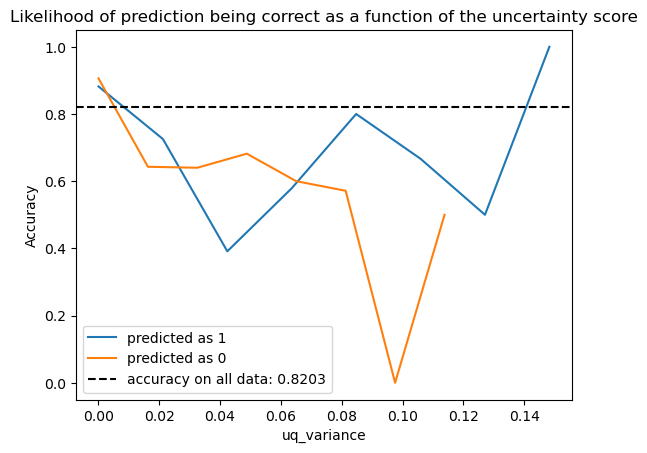

In [151]:
acc_plot_by_uq_bins_linear(data, method='uq_variance', bins=8)

# Uncertainties of the explanations

### functional groups

In [152]:
data_smask_fg

,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std
0,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-NO2,training,0.675013,0.217940,0.209143,0.908923,0.142593,0.804392,0.997516,0.381427,0.305211,0.409512,0.505167,0.314438
1,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-X,training,0.999479,0.995625,0.998777,0.999240,0.991579,0.995428,0.999244,0.992075,0.998548,0.999242,0.996924,0.003068
2,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-O,training,0.999489,0.996923,0.998425,0.999411,0.993976,0.997036,0.999623,0.993332,0.998322,0.999030,0.997557,0.002268
3,O=[N+]([O-])c1ccc([N+](=O)[O-])c(O)c1,1.0,-NO2,training,0.525002,0.407300,0.481606,0.406317,0.511455,0.252239,0.613243,0.718072,0.687605,0.356868,0.495971,0.147479
4,O=[N+]([O-])c1ccc([N+](=O)[O-])c(O)c1,1.0,-NO2,training,0.565702,0.421876,0.590934,0.465529,0.535489,0.310307,0.638259,0.744059,0.703398,0.411504,0.538706,0.137446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17786,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.990293,0.928286,0.996158,0.993627,0.995916,0.990659,0.995301,0.956868,0.993914,0.995156,0.983618,0.022744
17787,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.991217,0.922402,0.996173,0.993789,0.995771,0.990426,0.995916,0.959943,0.994247,0.996093,0.983598,0.024131
17788,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.990335,0.928047,0.996158,0.993632,0.995918,0.990814,0.995314,0.956912,0.993931,0.995152,0.983621,0.022811
17789,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.991185,0.922237,0.996172,0.993795,0.995777,0.990365,0.995921,0.959957,0.994264,0.996104,0.983578,0.024175


In [153]:
data_smask_fg_attribution

,smiles,label,sub_name,group,sub_pred_mean,sub_pred_std,mol_pred_mean,mol_pred_std,attribution,attribution_normalized
0,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-NO2,training,0.505167,0.314438,0.996906,0.003175,0.491739,0.455596
1,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-X,training,0.996924,0.003068,0.996906,0.003175,-0.000017,-0.000017
2,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-O,training,0.997557,0.002268,0.996906,0.003175,-0.000651,-0.000651
3,O=[N+]([O-])c1ccc([N+](=O)[O-])c(O)c1,1.0,-NO2,training,0.495971,0.147479,0.670813,0.110667,0.174842,0.173082
4,O=[N+]([O-])c1ccc([N+](=O)[O-])c(O)c1,1.0,-NO2,training,0.538706,0.137446,0.670813,0.110667,0.132107,0.131344
...,...,...,...,...,...,...,...,...,...,...
17786,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983618,0.022744,0.982702,0.027291,-0.000916,-0.000916
17787,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983598,0.024131,0.982702,0.027291,-0.000896,-0.000896
17788,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983621,0.022811,0.982702,0.027291,-0.000920,-0.000920
17789,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983578,0.024175,0.982702,0.027291,-0.000876,-0.000876


In [154]:
data_mol

,smiles,label,sub_name,group,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_mean,pred_std
0,Br/C=C/Br,1.0,noname,training,0.965351,0.776758,0.992938,0.963964,0.994616,0.991518,0.995365,0.817198,0.917920,0.943405,0.935903,0.078018
1,BrC(Br)Br,1.0,noname,training,0.534078,0.975998,0.999595,0.883009,0.958903,0.944101,0.968979,0.577899,0.950416,0.503003,0.829598,0.203958
2,BrC(Br)C(Br)(Br)Br,0.0,noname,training,0.033243,0.604935,0.089093,0.015768,0.143394,0.005841,0.014125,0.281884,0.000355,0.282411,0.147105,0.194036
3,BrC(Br)C(Br)Br,0.0,noname,training,0.034984,0.577018,0.048302,0.007717,0.048394,0.011149,0.094015,0.203856,0.000707,0.182702,0.120884,0.175334
4,BrC/C=C\CBr,1.0,noname,training,0.959285,0.923481,0.992506,0.983778,0.974871,0.989812,0.988103,0.918648,0.995279,0.864767,0.959053,0.043296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,c1cnccn1,0.0,noname,training,0.262552,0.160119,0.230631,0.182190,0.058099,0.062345,0.157436,0.127663,0.152486,0.076744,0.147026,0.068537
7668,c1csc(-c2nc(N3CCOCC3)c3ccccc3n2)c1,1.0,noname,training,0.561638,0.612791,0.703002,0.719327,0.874414,0.956561,0.989946,0.665142,0.698054,0.844109,0.762498,0.145438
7669,c1cscn1,1.0,noname,training,0.414827,0.279159,0.918118,0.551818,0.376787,0.858328,0.519087,0.325807,0.751774,0.567242,0.556295,0.222122
7670,c1scc2c1-c1cscc1C1NC21,1.0,noname,test,0.984245,0.918784,0.993505,0.983202,0.996069,0.986350,0.997392,0.979191,0.989668,0.988243,0.981665,0.022836


In [327]:
def uncertainty_of_attributions(data_attributions, data_mol, data_smasks, method='UQ_substructure'):
    """ 
    Calculate the uncertainty of the explanations for the substructure masks.
    """

    if method == 'UQ_substructure':
        """ 
        for this method, we will calculate the attribution score for each ensemble member seperatly, and then calculate the variance of these scores.
        """
        for idx in range(len(data_smasks)):

            for i in range(10):
                pred_smasks = data_smasks[f'pred_{i+1}'][idx]
                smiles = data_smasks['smiles'][idx]
                pred_mol= data_mol[data_mol['smiles'] == smiles][f'pred_{i+1}'].values[0]

                attribution = pred_mol - pred_smasks
                data_attributions.at[idx, f'attribution_{i+1}'] = attribution

            
        attr_variance = data_attributions[[f'attribution_{i+1}' for i in range(10)]].var(axis=1)
        data_attributions['uq_variance'] = attr_variance

        attr_mean = data_attributions[[f'attribution_{i+1}' for i in range(10)]].mean(axis=1)
        data_attributions['attribution_mean'] = attr_mean



    return data_attributions

            

In [276]:
data_smask_fg_attribution_UQ = uncertainty_of_attributions(data_smask_fg_attribution, data_mol, data_smask_fg)

In [277]:
data_smask_fg_attribution_UQ

,smiles,label,sub_name,group,sub_pred_mean,sub_pred_std,mol_pred_mean,mol_pred_std,attribution,attribution_normalized,...,attribution_3,attribution_4,attribution_5,attribution_6,attribution_7,attribution_8,attribution_9,attribution_10,uq_variance,attribution_mean
0,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-NO2,training,0.505167,0.314438,0.996906,0.003175,0.491739,0.455596,...,0.789697,0.090461,0.847745,0.192399,0.002034,0.611442,0.692452,0.589389,9.773182e-02,0.491739
1,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-X,training,0.996924,0.003068,0.996906,0.003175,-0.000017,-0.000017,...,0.000062,0.000143,-0.001242,0.001364,0.000305,0.000795,-0.000885,-0.000341,5.822198e-07,-0.000017
2,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,-O,training,0.997557,0.002268,0.996906,0.003175,-0.000651,-0.000651,...,0.000414,-0.000027,-0.003639,-0.000244,-0.000073,-0.000463,-0.000660,-0.000129,1.435080e-06,-0.000651
3,O=[N+]([O-])c1ccc([N+](=O)[O-])c(O)c1,1.0,-NO2,training,0.495971,0.147479,0.670813,0.110667,0.174842,0.173082,...,0.361087,0.276915,0.086890,0.334890,0.062716,0.061806,0.139267,0.175337,1.293238e-02,0.174842
4,O=[N+]([O-])c1ccc([N+](=O)[O-])c(O)c1,1.0,-NO2,training,0.538706,0.137446,0.670813,0.110667,0.132107,0.131344,...,0.251758,0.217703,0.062856,0.276822,0.037700,0.035819,0.123475,0.120701,8.643925e-03,0.132107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17786,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983618,0.022744,0.982702,0.027291,-0.000916,-0.000916,...,0.000003,-0.000501,0.000081,0.001377,0.000191,0.010624,-0.002194,0.000306,5.418950e-05,-0.000916
17787,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983598,0.024131,0.982702,0.027291,-0.000896,-0.000896,...,-0.000012,-0.000663,0.000226,0.001610,-0.000424,0.007550,-0.002526,-0.000632,2.686588e-05,-0.000896
17788,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983621,0.022811,0.982702,0.027291,-0.000920,-0.000920,...,0.000003,-0.000506,0.000080,0.001222,0.000178,0.010581,-0.002211,0.000309,5.301806e-05,-0.000920
17789,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983578,0.024175,0.982702,0.027291,-0.000876,-0.000876,...,-0.000011,-0.000669,0.000221,0.001671,-0.000429,0.007535,-0.002543,-0.000643,2.641980e-05,-0.000876


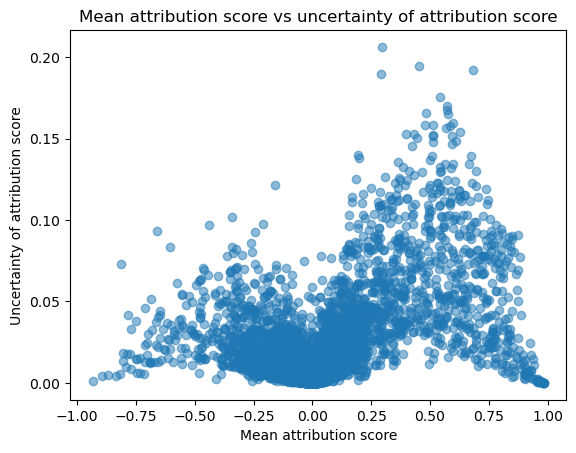

In [278]:
# plot from that data frame: sub_pred_st vs uq_variance
plt.scatter(data_smask_fg_attribution_UQ['attribution_mean'], data_smask_fg_attribution_UQ['uq_variance'], alpha=0.5)
plt.xlabel('Mean attribution score')
plt.ylabel('Uncertainty of attribution score')
plt.title('Mean attribution score vs uncertainty of attribution score')
plt.show()


In [280]:
data_smask_fg_attribution_UQ_test = data_smask_fg_attribution_UQ[data_smask_fg_attribution_UQ['group'] == 'test']
data_smask_fg_attribution_UQ_test

,smiles,label,sub_name,group,sub_pred_mean,sub_pred_std,mol_pred_mean,mol_pred_std,attribution,attribution_normalized,...,attribution_3,attribution_4,attribution_5,attribution_6,attribution_7,attribution_8,attribution_9,attribution_10,uq_variance,attribution_mean
16012,CCOP(=O)(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1,1.0,-NO2,test,0.433875,0.372259,0.620013,0.357979,0.186138,0.184018,...,0.162443,0.116459,0.226691,0.175799,0.351738,-0.047761,-0.298577,0.406092,0.059423,0.186138
16013,CCOP(=O)(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1,1.0,-OEt,test,0.594052,0.361546,0.620013,0.357979,0.025961,0.025955,...,0.044896,0.001378,0.109062,0.007253,-0.010443,-0.047742,-0.037668,0.158527,0.004840,0.025961
16014,CCOP(=O)(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1,1.0,=O,test,0.637463,0.325535,0.620013,0.357979,-0.017450,-0.017448,...,0.016028,0.038888,0.009683,0.053825,-0.016445,-0.166819,-0.088133,-0.008466,0.004237,-0.017450
16015,Cc1ccc([N+](=O)[O-])c([N+](=O)[O-])c1,1.0,-NO2,test,0.749348,0.095006,0.834569,0.075990,0.085221,0.085015,...,0.124304,0.113182,0.023312,0.045454,0.026443,0.048185,0.086883,0.207094,0.003048,0.085221
16016,Cc1ccc([N+](=O)[O-])c([N+](=O)[O-])c1,1.0,-NO2,test,0.749250,0.095274,0.834569,0.075990,0.085318,0.085112,...,0.122103,0.115332,0.023334,0.047076,0.026513,0.048079,0.088173,0.206431,0.003011,0.085318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17786,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983618,0.022744,0.982702,0.027291,-0.000916,-0.000916,...,0.000003,-0.000501,0.000081,0.001377,0.000191,0.010624,-0.002194,0.000306,0.000054,-0.000916
17787,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983598,0.024131,0.982702,0.027291,-0.000896,-0.000896,...,-0.000012,-0.000663,0.000226,0.001610,-0.000424,0.007550,-0.002526,-0.000632,0.000027,-0.000896
17788,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983621,0.022811,0.982702,0.027291,-0.000920,-0.000920,...,0.000003,-0.000506,0.000080,0.001222,0.000178,0.010581,-0.002211,0.000309,0.000053,-0.000920
17789,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,-O,test,0.983578,0.024175,0.982702,0.027291,-0.000876,-0.000876,...,-0.000011,-0.000669,0.000221,0.001671,-0.000429,0.007535,-0.002543,-0.000643,0.000026,-0.000876


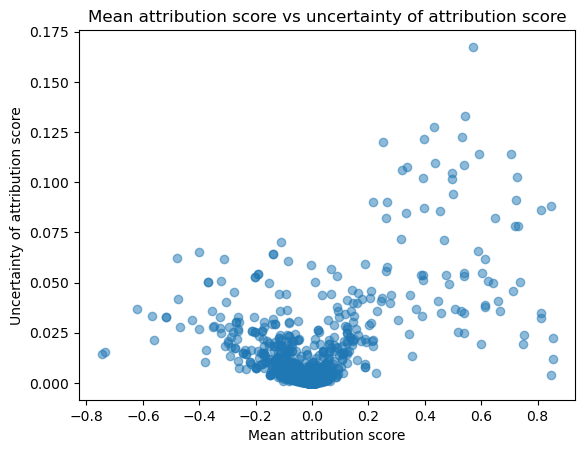

In [282]:
# plot from that data frame: sub_pred_st vs uq_variance
plt.scatter(data_smask_fg_attribution_UQ_test['attribution_mean'], data_smask_fg_attribution_UQ_test['uq_variance'], alpha=0.5)
plt.xlabel('Mean attribution score')
plt.ylabel('Uncertainty of attribution score')
plt.title('Mean attribution score vs uncertainty of attribution score')
plt.show()


In [283]:
# save as csv
data_smask_fg_attribution_UQ_test.to_csv('MUTAG_fg_attribution_UQ_testset.csv', index=False)

TODO: write a phython script that runs this and automatically saves it as csv files 

for now let us look at the fg attributions and uncertainties

In [103]:
# uncertainties of the explanations
def UQ_explanations(data): 
    """
    Calculate the uncertainty of the explanations for each molecule (i.e. for each unique smiles). 
    We use 4 different methods to calculate the uncertainty of the explanations:
    1. UX_highest  : The uncertainty is the maximum uncertainty of the substructure masks for this molecule (i.e. we only care about the uncertainty of the best explanation)
    2. UX_all      : The uncertainty is the sum of the uncertaintie of the different substructure masks for this molecule (i.e. take all possible explanations into account)
    3. UX_weighted : Same as UX_all, but the uncertainty is weighted by the absolute attribution score for each substructure mask
    4. UX_scaled   : Same as UX_weighted, but the weights are the fraction of the absolute attribution score for the substructure masks over all absolution attribution scores for all substructure masks or this molecule
    """


    # get the unique list of molecules from the data
    smiles_list = data['smiles'].unique()

    # create a new dataframe to store the results
    data_UQ = pd.DataFrame(columns=['smiles', 'label', 'ensemble_pred', 'ensemble_uncertainty', 'UX_highest', 'UX_all', 'UX_weighted', 'UX_scaled'])

    # iterate over the molecules
    for smiles in smiles_list: 

        smasks = data[data['smiles'] == smiles] # this will be a dataframe containing one row per substructure mask for this molecule
        
        # label and ensemble prediction are the same for all substructure masks, so we can just take the first value
        label = smasks['label'].values[0]
        ensemble_pred = smasks['mol_pred_mean'].values[0]

        # calculate the uncertainty of the ensemble prediction; this is the variance of the predictions of the ensemble members
        ensemble_uncertainty = smasks['mol_pred_std'].values[0] ** 2

        # calculate the uncertainty of the explanations
        UX_highest = smasks['uq_variance'].max()
        UX_all = smasks['uq_variance'].sum()
        UX_weighted = (smasks['uq_variance'] * smasks['attribution'].abs()).sum()
        UX_scaled = (smasks['uq_variance'] * smasks['attribution'].abs() / smasks['attribution'].abs().sum()).sum()

        # add the results to the dataframe by adding a new row 
        data_UQ = data_UQ.append({'smiles': smiles, 'label': label, 'ensemble_pred': ensemble_pred, 'ensemble_uncertainty': ensemble_uncertainty, 'UX_highest': UX_highest, 'UX_all': UX_all, 'UX_weighted': UX_weighted, 'UX_scaled': UX_scaled}, ignore_index=True)

    return data_UQ





In [ ]:
# print unique smiles in data_mol and in data_smask_fg and in data_smask_fg_attribution and in data_smask_fg_attribution_UQ
print("Number of unique smiles in data_mol", len(data_mol['smiles'].unique()))
print("Number of unique smiles in data_smask_fg", len(data_smask_fg['smiles'].unique()))
print("Number of unique smiles in data_smask_fg_attribution", len(data_smask_fg_attribution['smiles'].unique()))
print("Number of unique smiles in data_smask_fg_attribution_UQ", len(data_smask_fg_attribution_UQ['smiles'].unique()))

Number of unique smiles in data_mol 7672
Number of unique smiles in data_smask_fg 6804
Number of unique smiles in data_smask_fg_attribution 6804
Number of unique smiles in data_smask_fg_attribution_UQ 6804


In [ ]:
data_UQ_fg = UQ_explanations(data_smask_fg_attribution_UQ)
data_UQ_fg  

,smiles,label,ensemble_pred,ensemble_uncertainty,UX_highest,UX_all,UX_weighted,UX_scaled
0,O=[N+]([O-])c1cc(C(O)=Nc2cccc(Br)c2)cs1,1.0,0.996906,0.000010,0.097732,0.097734,4.805858e-02,0.097599
1,O=[N+]([O-])c1ccc([N+](=O)[O-])c(O)c1,1.0,0.670813,0.012247,0.012932,0.031889,6.058421e-03,0.010734
2,Nc1ccc(C=Cc2ccc([N+](=O)[O-])cc2)cc1,1.0,0.994610,0.000017,0.000068,0.000070,6.532503e-07,0.000060
3,O=C(Cl)c1ccccc1[N+](=O)[O-],1.0,0.984454,0.000211,0.002930,0.003345,8.625831e-05,0.002339
4,Nc1ccc(Oc2ccc([N+](=O)[O-])cc2)cc1,1.0,0.992367,0.000021,0.000045,0.000050,3.323216e-07,0.000035
...,...,...,...,...,...,...,...,...
6799,O=C(O)C(O)C(O)C(=O)O,0.0,0.048568,0.001666,0.001008,0.002283,4.618348e-05,0.000920
6800,CN1CCN=C(c2ccccc2)c2cc(Cl)ccc21,0.0,0.073165,0.003239,0.000472,0.000472,8.671764e-06,0.000472
6801,Cc1c([NH+]([O-])O)cc([NH+]([O-])O)cc1[NH+]([O-])O,1.0,0.977087,0.001495,0.000107,0.000331,6.231171e-07,0.000094
6802,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,0.982702,0.000745,0.000054,0.000210,3.778486e-07,0.000045


In [284]:
data_UQ_fg_test = UQ_explanations(data_smask_fg_attribution_UQ_test)
data_UQ_fg_test

,smiles,label,ensemble_pred,ensemble_uncertainty,UX_highest,UX_all,UX_weighted,UX_scaled
0,CCOP(=O)(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1,1.0,0.620013,0.128149,0.059423,0.068499,1.126041e-02,0.049055
1,Cc1ccc([N+](=O)[O-])c([N+](=O)[O-])c1,1.0,0.834569,0.005774,0.003048,0.006059,5.166864e-04,0.003030
2,COC(=O)C(C#N)=Cc1ccc([N+](=O)[O-])o1,1.0,0.989837,0.000315,0.045719,0.046182,3.252000e-02,0.044879
3,N#Cc1ccc(C=Cc2ccc([N+](=O)[O-])cc2)cc1,1.0,0.989558,0.000064,0.005801,0.005821,2.331094e-04,0.005768
4,O=[N+]([O-])c1cccc2c[nH]nc12,1.0,0.955457,0.000755,0.036069,0.036069,1.899902e-02,0.036069
...,...,...,...,...,...,...,...,...
679,O=C(O)C(O)C(O)C(=O)O,0.0,0.048568,0.001666,0.001008,0.002283,4.618348e-05,0.000920
680,CN1CCN=C(c2ccccc2)c2cc(Cl)ccc21,0.0,0.073165,0.003239,0.000472,0.000472,8.671764e-06,0.000472
681,Cc1c([NH+]([O-])O)cc([NH+]([O-])O)cc1[NH+]([O-])O,1.0,0.977087,0.001495,0.000107,0.000331,6.231171e-07,0.000094
682,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,0.982702,0.000745,0.000054,0.000210,3.778486e-07,0.000045


In [285]:
# save as csv
data_UQ_fg_test.to_csv('MUTAG_fg_UQ_and_UXUQ_testset.csv', index=False)

Let's plot!

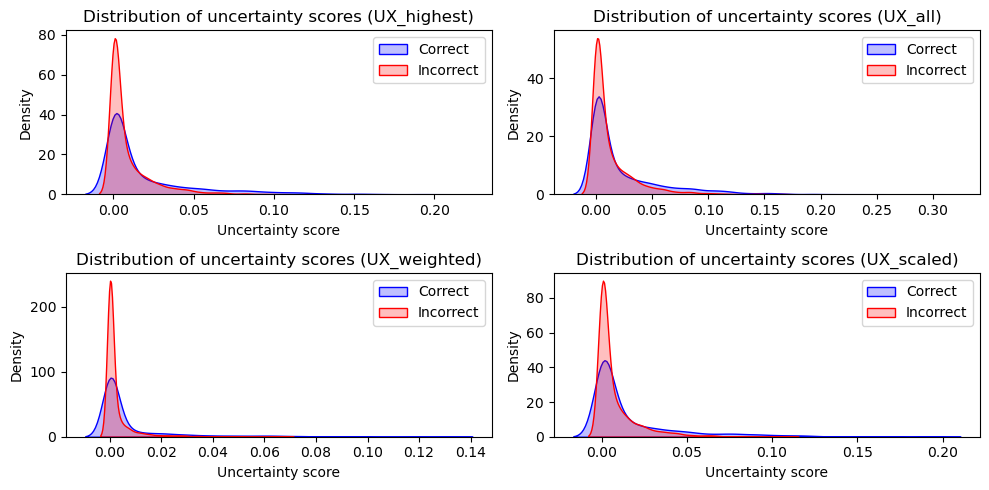

In [ ]:
# make 4 plots for the 4 different methods to calculate the uncertainty of the explanations. Plot, as previously also for the uncertainty of the prediction, the distribution of uncertainty scores for correct and wrong predictions.
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.kdeplot(data_UQ_fg[data_UQ_fg['ensemble_pred'] >= 0.5]['UX_highest'], label='Correct', color='blue', shade=True)
sns.kdeplot(data_UQ_fg[data_UQ_fg['ensemble_pred'] < 0.5]['UX_highest'], label='Incorrect', color='red', shade=True)
plt.xlabel('Uncertainty score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of uncertainty scores (UX_highest)')
plt.subplot(2, 2, 2)
sns.kdeplot(data_UQ_fg[data_UQ_fg['ensemble_pred'] >= 0.5]['UX_all'], label='Correct', color='blue', shade=True)
sns.kdeplot(data_UQ_fg[data_UQ_fg['ensemble_pred'] < 0.5]['UX_all'], label='Incorrect', color='red', shade=True)
plt.xlabel('Uncertainty score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of uncertainty scores (UX_all)')
plt.subplot(2, 2, 3)
sns.kdeplot(data_UQ_fg[data_UQ_fg['ensemble_pred'] >= 0.5]['UX_weighted'], label='Correct', color='blue', shade=True)
sns.kdeplot(data_UQ_fg[data_UQ_fg['ensemble_pred'] < 0.5]['UX_weighted'], label='Incorrect', color='red', shade=True)
plt.xlabel('Uncertainty score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of uncertainty scores (UX_weighted)')
plt.subplot(2, 2, 4)
sns.kdeplot(data_UQ_fg[data_UQ_fg['ensemble_pred'] >= 0.5]['UX_scaled'], label='Correct', color='blue', shade=True)
sns.kdeplot(data_UQ_fg[data_UQ_fg['ensemble_pred'] < 0.5]['UX_scaled'], label='Incorrect', color='red', shade=True)
plt.xlabel('Uncertainty score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of uncertainty scores (UX_scaled)')
plt.tight_layout()  
plt.show()



In [313]:
def correlation(X, data, filename="x"):
    # make 4 plots for the 4 different methods to calculate the uncertainty of the explanations. Plot relationship between the uncertainty of the explanations and the uncertainty of the ensemble prediction
    plt.figure(figsize=(5, 5))
    plt.subplot(2, 2, 1)
    plt.scatter(X, data['UX_highest'], alpha=0.3)
    # add function that approximates the relationship in the data
    p = np.poly1d(np.polyfit(X, data['UX_highest'], 1))
    t = np.linspace(X.min(), X.max(), 100)
    plt.plot(t, p(t), 'r--', label="corr: " + str(round(X.corr(data['UX_highest']), 2)))
    plt.legend()
    plt.xlabel('Predictive uncertainty')
    plt.ylabel('UX_highest')
    plt.title('UX_highest')


    plt.subplot(2, 2, 2)
    plt.scatter(X, data['UX_all'], alpha=0.3)
    p = np.poly1d(np.polyfit(X, data['UX_all'], 1))
    t = np.linspace(X.min(), X.max(), 100)
    plt.plot(t, p(t), 'r--', label="corr: " + str(round(X.corr(data['UX_all']), 2)))
    plt.legend()
    plt.xlabel('Predictive uncertainty')
    plt.ylabel('UX_all')
    plt.title('UX_all')
    plt.subplot(2, 2, 3)
    plt.scatter(X, data['UX_weighted'], alpha=0.3)
    p = np.poly1d(np.polyfit(X, data['UX_weighted'], 1))
    t = np.linspace(X.min(), X.max(), 100)
    plt.plot(t, p(t), 'r--', label="corr: " + str(round(X.corr(data['UX_weighted']), 2)))
    plt.legend()
    plt.xlabel('Predictive uncertainty')
    plt.ylabel('UX_weighted')
    plt.title('UX_weighted')
    plt.subplot(2, 2, 4)
    plt.scatter(X, data['UX_scaled'], alpha=0.3)
    p = np.poly1d(np.polyfit(X, data['UX_scaled'], 1))
    t = np.linspace(X.min(), X.max(), 100)
    plt.plot(t, p(t), 'r--', label="corr: " + str(round(X.corr(data['UX_scaled']), 2)))
    plt.legend()
    plt.xlabel('Predictive uncertainty')
    plt.ylabel('UX_scaled')
    plt.title('UX_scaled')
    plt.tight_layout()

    plt.savefig("MUTAG_" + filename + "_correlation_UQ_UXUQ.pdf", bbox_inches='tight')

    plt.show()

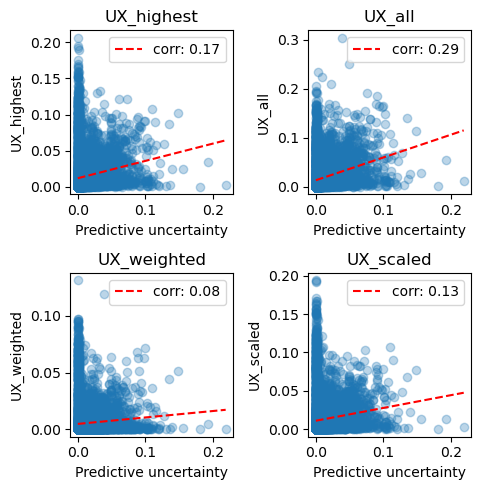

In [314]:
correlation(data_UQ_fg['ensemble_uncertainty'], data_UQ_fg, filename="fg_variance_based")

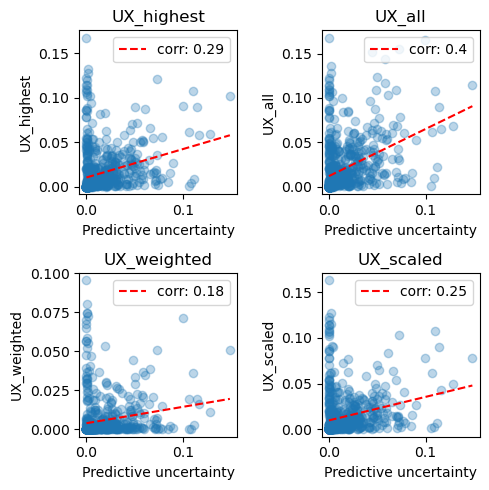

In [315]:
# same plots but only for the test set 
correlation(data_UQ_fg_test['ensemble_uncertainty'], data_UQ_fg_test, filename="fg_variance_based_testset")

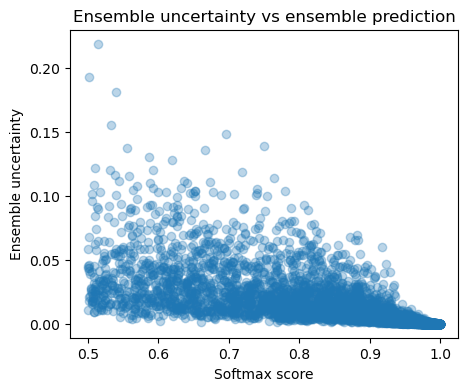

In [316]:
# plot ensemble uncertainty vs ensemble prediction
plt.figure(figsize=(5, 4))
softmax = data_UQ_fg['ensemble_pred'].tolist()
# everytime the ensemble prediction is below 0.5, we need to take 1 - prediction
softmax = [x if x >= 0.5 else 1 - x for x in softmax]
plt.scatter(softmax, data_UQ_fg['ensemble_uncertainty'], alpha=0.3)
plt.xlabel('Softmax score')
plt.ylabel('Ensemble uncertainty')
plt.title('Ensemble uncertainty vs ensemble prediction')
plt.show()

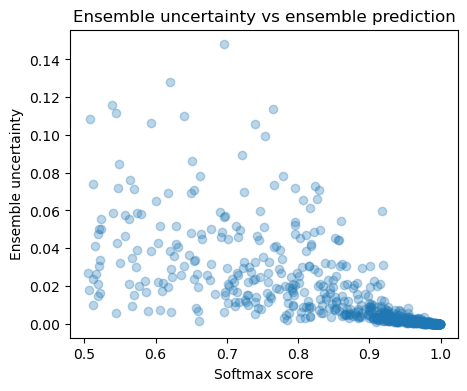

In [317]:
# plot ensemble uncertainty vs ensemble prediction
plt.figure(figsize=(5, 4))
softmax_test = data_UQ_fg_test['ensemble_pred'].tolist()
# everytime the ensemble prediction is below 0.5, we need to take 1 - prediction
softmax_test = [x if x >= 0.5 else 1 - x for x in softmax_test]
plt.scatter(softmax_test, data_UQ_fg_test['ensemble_uncertainty'], alpha=0.3)
plt.xlabel('Softmax score')
plt.ylabel('Ensemble uncertainty')
plt.title('Ensemble uncertainty vs ensemble prediction')
plt.show()

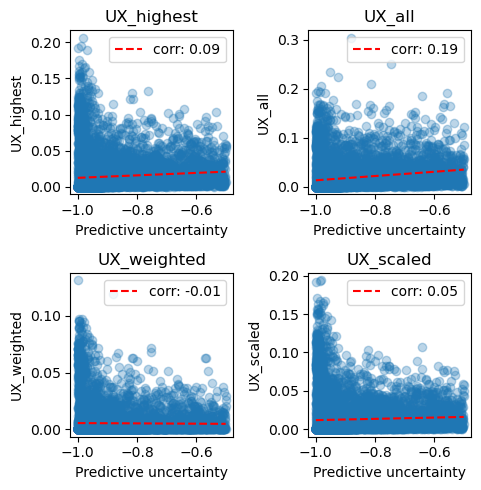

In [318]:
softmax_all = pd.Series(softmax)
# negate the softmax scores so it represents uncertainties instead of certainties
softmax_all = -softmax_all 
correlation(softmax_all, data_UQ_fg, filename="fg_softmax_based")

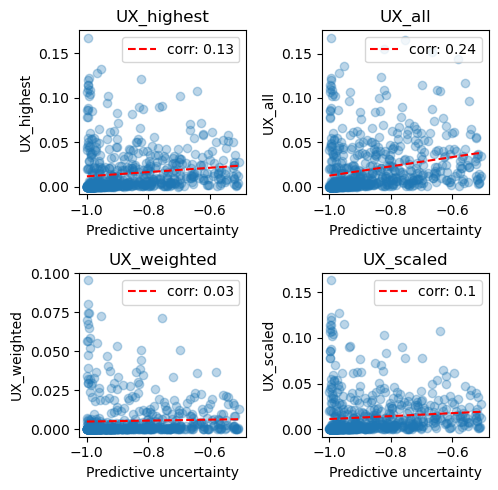

In [319]:
softmax_test = pd.Series(softmax_test)
# negate the softmax scores so it represents uncertainties instead of certainties
softmax_test = -softmax_test
correlation(softmax_test, data_UQ_fg_test, filename="fg_softmax_based_testset")

### murcko

In [368]:
# load data
data_mol = pd.read_csv(data_path_mol)
data_smask_murcko = pd.read_csv(data_path_smask_murcko)
data_smask_murcko_emerge = pd.read_csv(data_path_smask_murcko_emerge)

data_smask_murcko_attribution = pd.read_csv(path_smask_murcko_attribution)
data_smask_murcko_emerge_attribution = pd.read_csv(path_smask_murcko_emerge_attribution)

In [369]:
# only get the test data 
data_smask_murcko_attribution_test = data_smask_murcko_attribution[data_smask_murcko_attribution['group'] == 'test'].reset_index(drop=True)
data_mol_test = data_mol[data_mol['group'] == 'test'].reset_index(drop=True)
data_smask_murcko_test = data_smask_murcko[data_smask_murcko['group'] == 'test'].reset_index(drop=True)

In [373]:
data_smask_murcko_attribution_UQ_test = uncertainty_of_attributions(data_smask_murcko_attribution_test, data_mol_test, data_smask_murcko_test)

# save as csv
data_smask_murcko_attribution_UQ_test.to_csv('MUTAG_murcko_attribution_UQ_testset.csv', index=False)

In [375]:
data_UQ_murcko_test = UQ_explanations(data_smask_murcko_attribution_UQ_test)

# save as csv
data_UQ_murcko_test.to_csv('MUTAG_murcko_UQ_and_UXUQ_testset.csv', index=False)  

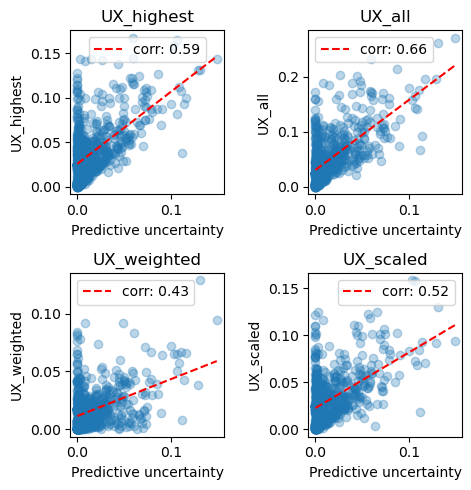

In [376]:
correlation(data_UQ_murcko_test['ensemble_uncertainty'], data_UQ_murcko_test, filename="murcko_variance_based_testset")

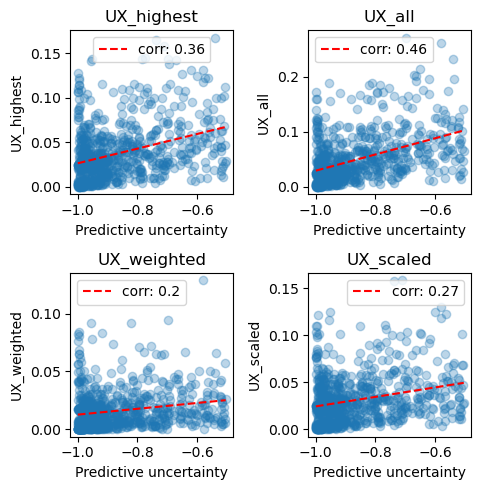

In [377]:
softmax_murcko_test = data_UQ_murcko_test['ensemble_pred'].tolist()
# everytime the ensemble prediction is below 0.5, we need to take 1 - prediction
softmax_murcko_test = [x if x >= 0.5 else 1 - x for x in softmax_murcko_test]
softmax_murcko_test = pd.Series(softmax_murcko_test)
# negate the softmax scores so it represents uncertainties instead of certainties
softmax_murcko_test = -softmax_murcko_test

correlation(softmax_murcko_test, data_UQ_murcko_test, filename="murcko_softmax_based_testset")

### Brics

In [378]:
# load data
data_mol = pd.read_csv(data_path_mol)
data_smask_brics = pd.read_csv(data_path_smask_brics)
data_smask_brics_emerge = pd.read_csv(data_path_smask_brics_emerge)
data_smask_brics_attribution = pd.read_csv(path_smask_brics_attribution)
data_smask_brics_emerge_attribution = pd.read_csv(path_smask_brics_emerge_attribution)

In [379]:
# only keep the test data
data_smask_brics_attribution_test = data_smask_brics_attribution[data_smask_brics_attribution['group'] == 'test'].reset_index(drop=True)
data_mol_test = data_mol[data_mol['group'] == 'test'].reset_index(drop=True)
data_smask_brics_test = data_smask_brics[data_smask_brics['group'] == 'test'].reset_index(drop=True)


In [380]:
# calculate attributions 
data_smask_brics_attribution_UQ_test = uncertainty_of_attributions(data_smask_brics_attribution_test, data_mol_test, data_smask_brics_test)

# save as csv
data_smask_brics_attribution_UQ_test.to_csv('MUTAG_brics_attribution_UQ_testset.csv', index=False)

In [381]:
data_UQ_brics_test = UQ_explanations(data_smask_brics_attribution_UQ_test)

# save as csv
data_UQ_brics_test.to_csv('MUTAG_brics_UQ_and_UXUQ_testset.csv', index=False)

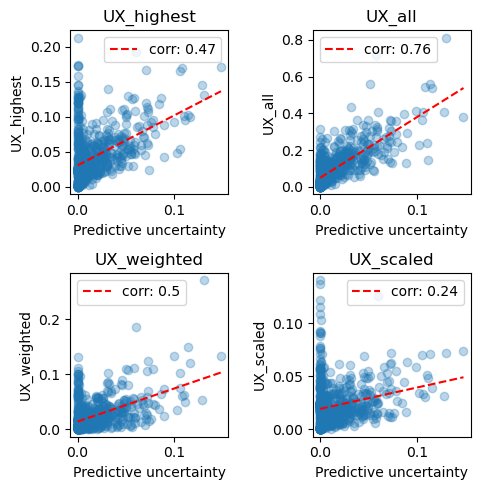

In [382]:
correlation(data_UQ_brics_test['ensemble_uncertainty'], data_UQ_brics_test, filename="brics_variance_based_testset")

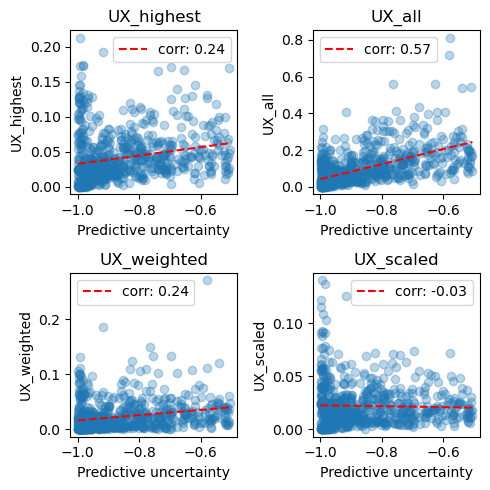

In [383]:
softmax_brics_test = data_UQ_brics_test['ensemble_pred'].tolist()
# everytime the ensemble prediction is below 0.5, we need to take 1 - prediction
softmax_brics_test = [x if x >= 0.5 else 1 - x for x in softmax_brics_test]
softmax_brics_test = pd.Series(softmax_brics_test)

# negate the softmax scores so it represents uncertainties instead of certainties
softmax_brics_test = -softmax_brics_test

correlation(softmax_brics_test, data_UQ_brics_test, filename="brics_softmax_based_testset")

# Evaluation of Relation of Explanation Uncertainty to Correctness of Prediction

In [387]:
def generate_subset(data, column_name, ascending=True, bins=10, linear=False):

    # sort data by the softmax score with high scores first
    data_sorted = data.sort_values(by=column_name, ascending=ascending)

    subsets = []

    # iterate over the data and calculate the accuracies when only using the top n predictions. Do this in steps corresponding to percentages
    if not linear:
        for i in range(1, bins+1):
            # the subset is the data from row 0 to row i
            subset = data_sorted.iloc[int((i-1)/bins * len(data_sorted)):int(i/bins * len(data_sorted))]
            subsets.append(subset)
    else:
        # make bins represent a linear representation of uncertainty scores between min and max value that appear
        min_val = data_sorted[column_name].min()
        max_val = data_sorted[column_name].max()
        stepsize = (max_val - min_val) / bins
        for i in range(1, bins+1):
            subset = data_sorted[(data_sorted[column_name] >= min_val + (i-1) * stepsize) & (data_sorted[column_name] < min_val + i * stepsize)]
            subsets.append(subset)

    return subsets

In [454]:
def subsets_by_UQ_plot(data, ascending=True, bins=10, linear=False, plot_type='per_dataset', title="", name=""):
    
    subsets_UX_highest = generate_subset(data, 'UX_highest', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_all = generate_subset(data, 'UX_all', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_weighted = generate_subset(data, 'UX_weighted', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_scaled = generate_subset(data, 'UX_scaled', ascending=ascending, bins=bins, linear=linear)

    # calculate accuracy for each subset
    acc_UX_highest = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_highest]
    acc_UX_all = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_all]
    acc_UX_weighted = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_weighted]
    acc_UX_scaled = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_scaled]
  


    acc = metrics.accuracy_score(data['label'], [1 if x > 0.5 else 0 for x in data['ensemble_pred']])

    if plot_type == 'per_dataset':
        # plot 
        plt.figure(figsize=(5, 3))
        plt.plot(range(1, bins+1), acc_UX_highest, label='UX_highest')
        plt.plot(range(1, bins+1), acc_UX_all, label='UX_all')
        plt.plot(range(1, bins+1), acc_UX_weighted, label='UX_weighted')
        plt.plot(range(1, bins+1), acc_UX_scaled, label='UX_scaled')

        # add a line for the overall accuracy with number in the label
        plt.axhline(y=acc, color='black', linestyle='--', label='accuracy on all data: ' + str(round(acc, 4)))
        plt.xlabel('Uncertainty')
        xlabels = ['' for i in range(bins)]
        xlabels[0] = 'low'
        xlabels[-1] = 'high'
        plt.xticks(range(1, bins+1, 1), xlabels)
        plt.ylabel('Accuracy')
        #plt.title('Likelihood of prediction being correct as a function of the explanation uncertainty score')
        plt.legend()
        plt.title(title)

        plt.savefig('MUTAG_acc_plot_by_UXUQ_likelihood_' + name + '.pdf', bbox_inches='tight')

    plt.show()


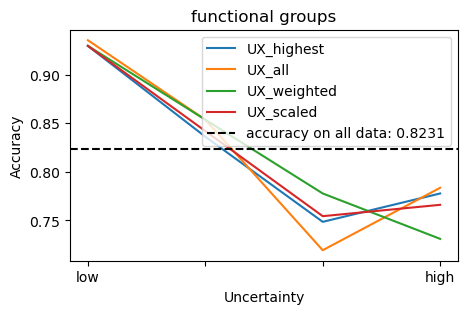

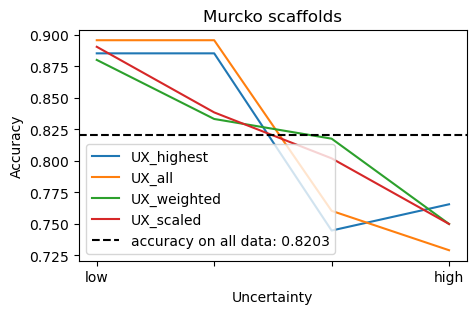

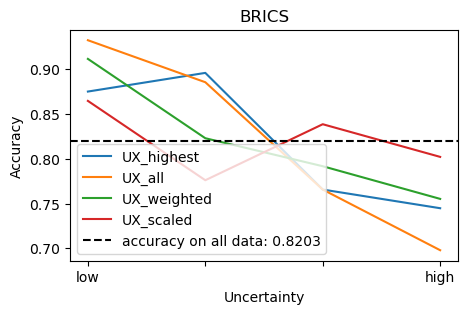

In [455]:
bins = 4
subsets_by_UQ_plot(data_UQ_fg_test, bins=bins, ascending=True, linear=False, title="functional groups", name="fg")
subsets_by_UQ_plot(data_UQ_murcko_test, bins=bins, ascending=True, linear=False, title="Murcko scaffolds", name="murcko")
subsets_by_UQ_plot(data_UQ_brics_test, bins=bins, ascending=True, linear=False, title="BRICS", name="brics")

In [421]:
def subsets_by_UQ_plot_per_XAI_method(data_fg, data_murcko, data_brics, ascending=True, bins=10, linear=False):
    
    subsets_UX_highest_fg = generate_subset(data_fg, 'UX_highest', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_all_fg = generate_subset(data_fg, 'UX_all', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_weighted_fg = generate_subset(data_fg, 'UX_weighted', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_scaled_fg = generate_subset(data_fg, 'UX_scaled', ascending=ascending, bins=bins, linear=linear)

    # calculate accuracy for each subset
    acc_UX_highest_fg = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_highest_fg]
    acc_UX_all_fg = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_all_fg]
    acc_UX_weighted_fg = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_weighted_fg]
    acc_UX_scaled_fg = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_scaled_fg]

    acc_fg = metrics.accuracy_score(data_fg['label'], [1 if x > 0.5 else 0 for x in data_fg['ensemble_pred']])

    subsets_UX_highest_murcko = generate_subset(data_murcko, 'UX_highest', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_all_murcko = generate_subset(data_murcko, 'UX_all', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_weighted_murcko = generate_subset(data_murcko, 'UX_weighted', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_scaled_murcko = generate_subset(data_murcko, 'UX_scaled', ascending=ascending, bins=bins, linear=linear)

    # calculate accuracy for each subset
    acc_UX_highest_murcko = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_highest_murcko]
    acc_UX_all_murcko = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_all_murcko]
    acc_UX_weighted_murcko = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_weighted_murcko]
    acc_UX_scaled_murcko = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_scaled_murcko]


    subsets_UX_highest_brics = generate_subset(data_brics, 'UX_highest', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_all_brics = generate_subset(data_brics, 'UX_all', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_weighted_brics = generate_subset(data_brics, 'UX_weighted', ascending=ascending, bins=bins, linear=linear)
    subsets_UX_scaled_brics = generate_subset(data_brics, 'UX_scaled', ascending=ascending, bins=bins, linear=linear)

    # calculate accuracy for each subset
    acc_UX_highest_brics = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_highest_brics]
    acc_UX_all_brics = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_all_brics]
    acc_UX_weighted_brics = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_weighted_brics]
    acc_UX_scaled_brics = [metrics.accuracy_score(subset['label'], [1 if x > 0.5 else 0 for x in subset['ensemble_pred']]) for subset in subsets_UX_scaled_brics]
  

  
    # plot 4 subplots with the 4 different methods to calculate the uncertainty of the explanations
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.plot(range(1, bins+1), acc_UX_highest_fg, label='fg')
    plt.plot(range(1, bins+1), acc_UX_highest_murcko, label='murcko')
    plt.plot(range(1, bins+1), acc_UX_highest_brics, label='brics')
    plt.axhline(y=acc_fg, color='black', linestyle='--', label='accuracy: ' + str(round(acc_fg, 4)))
    plt.xlabel('Uncertainty')
    plt.xticks(range(1, 11, 1), ['low', '', '', '', '', '', '', '', '', 'high'])
    plt.ylabel('Accuracy')
    plt.title('UX_highest')
    plt.legend()
    plt.subplot(2, 2, 2)
    plt.plot(range(1, bins+1), acc_UX_all_fg, label='fg')
    plt.plot(range(1, bins+1), acc_UX_all_murcko, label='murcko')
    plt.plot(range(1, bins+1), acc_UX_all_brics, label='brics')
    plt.axhline(y=acc_fg, color='black', linestyle='--', label='accuracy on fg: ' + str(round(acc_fg, 4)))
    plt.xlabel('Uncertainty')
    plt.xticks(range(1, 11, 1), ['low', '', '', '', '', '', '', '', '', 'high'])
    plt.ylabel('Accuracy')
    plt.title('UX_all')
    plt.legend()
    plt.subplot(2, 2, 3)
    plt.plot(range(1, bins+1), acc_UX_weighted_fg, label='fg')
    plt.plot(range(1, bins+1), acc_UX_weighted_murcko, label='murcko')
    plt.plot(range(1, bins+1), acc_UX_weighted_brics, label='brics')
    plt.axhline(y=acc_fg, color='black', linestyle='--', label='accuracy: ' + str(round(acc_fg, 4)))
    plt.xlabel('Uncertainty')
    plt.xticks(range(1, 11, 1), ['low', '', '', '', '', '', '', '', '', 'high'])
    plt.ylabel('Accuracy')
    plt.title('UX_weighted')
    plt.legend()
    plt.subplot(2, 2, 4)
    plt.plot(range(1, bins+1), acc_UX_scaled_fg, label='fg')
    plt.plot(range(1, bins+1), acc_UX_scaled_murcko, label='murcko')
    plt.plot(range(1, bins+1), acc_UX_scaled_brics, label='brics')
    plt.axhline(y=acc_fg, color='black', linestyle='--', label='accuracy: ' + str(round(acc_fg, 4)))
    plt.xlabel('Uncertainty')
    plt.xticks(range(1, 11, 1), ['low', '', '', '', '', '', '', '', '', 'high'])
    plt.ylabel('Accuracy')
    plt.title('UX_scaled')
    plt.legend()
    plt.tight_layout()
    plt.show()

  




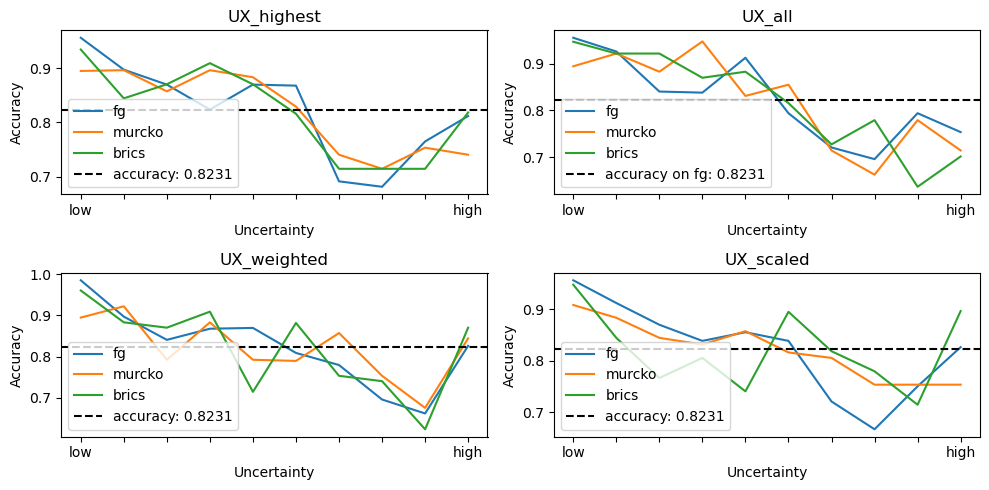

In [422]:
subsets_by_UQ_plot_per_XAI_method(data_UQ_fg_test, data_UQ_murcko_test, data_UQ_brics_test, bins=10, ascending=True, linear=False)

In [418]:
data_UQ_fg_test

,smiles,label,ensemble_pred,ensemble_uncertainty,UX_highest,UX_all,UX_weighted,UX_scaled
0,CCOP(=O)(Oc1ccc([N+](=O)[O-])cc1)c1ccccc1,1.0,0.620013,0.128149,0.059423,0.068499,1.126041e-02,0.049055
1,Cc1ccc([N+](=O)[O-])c([N+](=O)[O-])c1,1.0,0.834569,0.005774,0.003048,0.006059,5.166864e-04,0.003030
2,COC(=O)C(C#N)=Cc1ccc([N+](=O)[O-])o1,1.0,0.989837,0.000315,0.045719,0.046182,3.252000e-02,0.044879
3,N#Cc1ccc(C=Cc2ccc([N+](=O)[O-])cc2)cc1,1.0,0.989558,0.000064,0.005801,0.005821,2.331094e-04,0.005768
4,O=[N+]([O-])c1cccc2c[nH]nc12,1.0,0.955457,0.000755,0.036069,0.036069,1.899902e-02,0.036069
...,...,...,...,...,...,...,...,...
679,O=C(O)C(O)C(O)C(=O)O,0.0,0.048568,0.001666,0.001008,0.002283,4.618348e-05,0.000920
680,CN1CCN=C(c2ccccc2)c2cc(Cl)ccc21,0.0,0.073165,0.003239,0.000472,0.000472,8.671764e-06,0.000472
681,Cc1c([NH+]([O-])O)cc([NH+]([O-])O)cc1[NH+]([O-])O,1.0,0.977087,0.001495,0.000107,0.000331,6.231171e-07,0.000094
682,[O-][NH+](O)c1ccc(F)c([NH+]([O-])O)c1,1.0,0.982702,0.000745,0.000054,0.000210,3.778486e-07,0.000045
